<a href="https://colab.research.google.com/github/nicolas-pavon/Analitica_colab/blob/master/Entrega%202/Housing_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#para acceder a archivos desde google drive en google colaboratory
#acceso a google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#
file_id = '1pe9H6JpbYgQaXKpOP0lNjoNS2cwmUjNA' #copiar nombre nombre del link de compartir despues de ID
downloaded = drive.CreateFile({'id': file_id})
Xdata = downloaded.GetContentFile('housing.csv') 
#base de datos
Xdata = pd.read_csv("housing.csv")

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
Xtrain, Xtest= train_test_split(Xdata,test_size=0.3)
Ytrain = Xtrain["median_house_value"]
Ytest = Xtest["median_house_value"]

Xtrain["total_bedrooms"] = SimpleImputer(strategy='median').fit_transform(pd.DataFrame(Xtrain["total_bedrooms"])).reshape(-1)
Xtrain = OrdinalEncoder().fit_transform(Xtrain)
Xtrain = StandardScaler().fit_transform(Xtrain)
y_pred  = GaussianMixture(n_components=3, random_state=42).fit(Xtrain).predict(Xtrain)

## MINIBATCH KMEANS

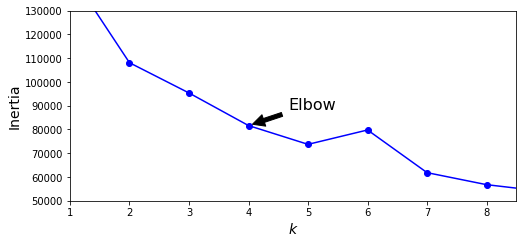

In [3]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans_per_k = [MiniBatchKMeans(n_clusters=k, batch_size=10, random_state=42).fit(Xtrain)
                for k in range(1, 10)]
inertias_mini_batch = [model_minibatch.inertia_ for model_minibatch in minibatch_kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias_mini_batch, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias_mini_batch[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 50000, 130000])
plt.show()


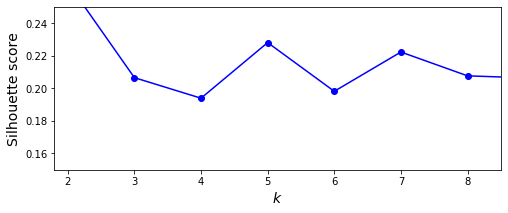

In [4]:
from sklearn.metrics import silhouette_score
minibatch_silhouette_scores = [silhouette_score(Xtrain, model_minibatch.labels_)
                     for model_minibatch in minibatch_kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), minibatch_silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.15, 0.25])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

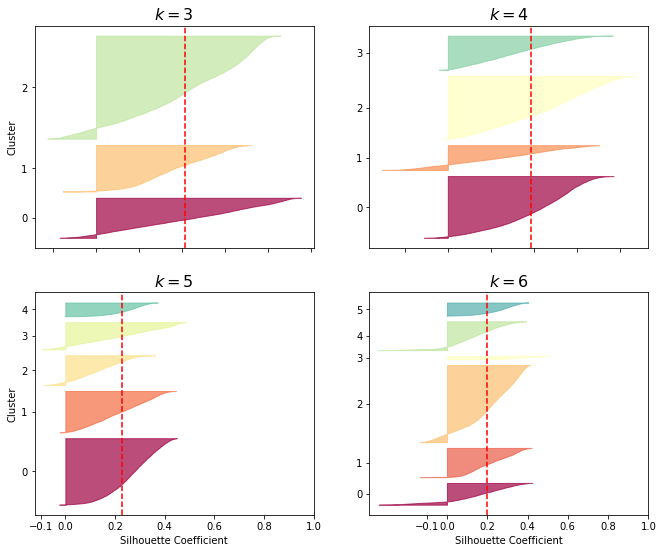

In [5]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = minibatch_kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(Xtrain, y_pred)

    padding = len(Xtrain) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=minibatch_silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

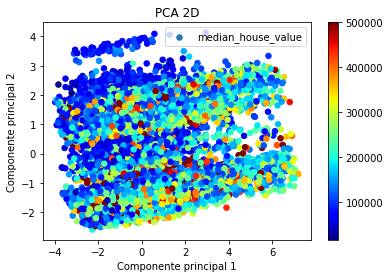

In [6]:
from sklearn.decomposition import PCA 
import pandas as pd
minibatch_PCA = PCA()
X_minibatch_PCA = pd.DataFrame(minibatch_PCA.fit_transform(Xtrain))
X_minibatch_PCA.plot(kind="scatter",x=0,y=1,
               c = Ytrain, s=30, label = "median_house_value",
              colormap = "jet",colorbar=True, sharex=False)    
plt.title('PCA 2D')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

## K-Means

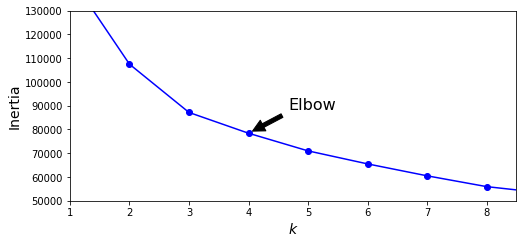

In [7]:
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Xtrain)
                for k in range(1, 10)]
inertias_kmeans = [model_kmeans.inertia_ for model_kmeans in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias_kmeans, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias_kmeans[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 50000, 130000])
plt.show()


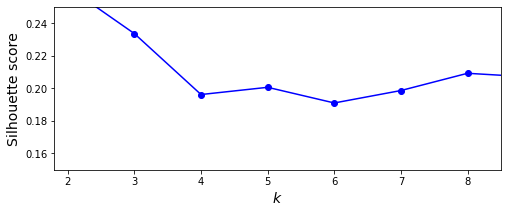

In [8]:
from sklearn.metrics import silhouette_score
kmeans_silhouette_scores = [silhouette_score(Xtrain, model_kmeans.labels_)
                     for model_kmeans in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), kmeans_silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.15, 0.25])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

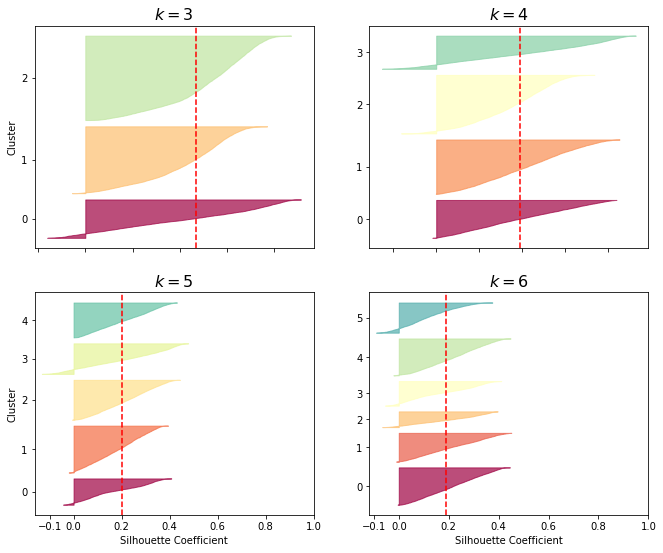

In [9]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(Xtrain, y_pred)

    padding = len(Xtrain) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=kmeans_silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

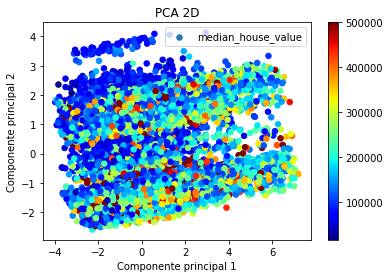

In [10]:
from sklearn.decomposition import PCA 
import pandas as pd
kmeans_PCA = PCA()
X_kmeans_PCA = pd.DataFrame(kmeans_PCA.fit_transform(Xtrain))
X_kmeans_PCA.plot(kind="scatter",x=0,y=1,
               c = Ytrain, s=30, label = "median_house_value",
              colormap = "jet",colorbar=True, sharex=False)    
plt.title('PCA 2D')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

## DBSACAN

In [0]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [0]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


In [0]:
from sklearn.cluster import DBSCAN
DBSCAN_1 = DBSCAN(eps=0.2, min_samples=5).fit(Xtrain)
DBSCAN_2 = DBSCAN(eps=0.5, min_samples=5).fit(Xtrain)
DBSCAN_3 = DBSCAN(eps=0.8, min_samples=5).fit(Xtrain)
DBSCAN_4 = DBSCAN(eps=1, min_samples=5).fit(Xtrain)

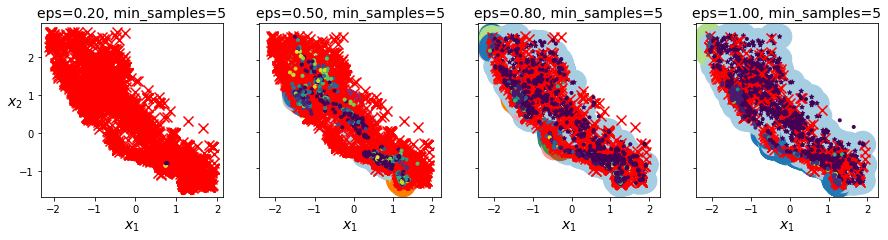

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 3.2))

plt.subplot(141)
plot_dbscan(DBSCAN_1, Xtrain, size=100)

plt.subplot(142)
plot_dbscan(DBSCAN_2, Xtrain, size=600, show_ylabels=False)

plt.subplot(143)
plot_dbscan(DBSCAN_3, Xtrain, size=600, show_ylabels=False)
plt.subplot(144)
plot_dbscan(DBSCAN_4, Xtrain, size=600, show_ylabels=False)

plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=50)
knn_1.fit(DBSCAN_1.components_, DBSCAN_1.labels_[DBSCAN_1.core_sample_indices_])
knn_2 = KNeighborsClassifier(n_neighbors=50)
knn_2.fit(DBSCAN_2.components_, DBSCAN_2.labels_[DBSCAN_2.core_sample_indices_])
knn_3 = KNeighborsClassifier(n_neighbors=50)
knn_3.fit(DBSCAN_3.components_, DBSCAN_3.labels_[DBSCAN_3.core_sample_indices_])
knn_4 = KNeighborsClassifier(n_neighbors=50)
knn_4.fit(DBSCAN_4.components_, DBSCAN_4.labels_[DBSCAN_4.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

## Spectral Clustering

In [16]:
from sklearn.cluster import SpectralClustering
sc1 = SpectralClustering(n_clusters=2,assign_labels="discretize",random_state=0)
sc1.fit(Xtrain)


SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)

In [0]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

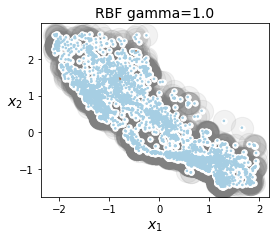

In [18]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, Xtrain, size=500, alpha=0.1)

plt.show()